# PHYS 432 Assignment 3 - Question 3

Ruijia Yang

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Overview

The steady-state solution found in lecture is:

$$\vec{u}(x) = -\frac{g}{\nu}\sin{\alpha}\left(\frac{1}{2}x^2 - Hx\right)\hat{y}$$

The equation to be solved is

$$(\partial_t + \vec{u}\cdot\vec{\nabla})\vec{u}_x = \frac{\vec{f}_{\textrm{body}}}{\rho} + \nu\nabla^2\vec{u_x}$$

In one dimension,

$$\frac{\partial u}{\partial t} = g\sin{\alpha} + \nu\frac{\partial^2u}{\partial x^2}$$

$$\frac{\partial u}{\partial t} = \nu\frac{\partial^2u}{\partial x^2} \implies \textrm{to be solved with diffusion code}$$

$$\frac{\partial u}{\partial t} = g\sin{\alpha} \implies u(x,t) = gt\sin{\alpha}$$ 

Then combine both conditions while imposing that $u(0,t) = 0$ at all times. 

Initial state: velocity is zero at all points.

In [2]:
def steady_state(viscosity, height, inclination, x):
    """
    Calculates the steady-state solution along animation line, 
    given viscosity (m^2/s), height of lava (m), inclination (rad)
    """
    return (-9.8*np.sin(inclination)*(0.5*x**2 - height*x))/viscosity

In [3]:
lava_visc = 0.25 # m^2/s  as found in class
lava_height = 0.1 # m
lava_inc = 0.17 # rad

In [4]:
steady_state_x = np.linspace(0,lava_height,30)
steady_state_y = steady_state(lava_visc, lava_height, lava_inc, np.linspace(0,lava_height,30))

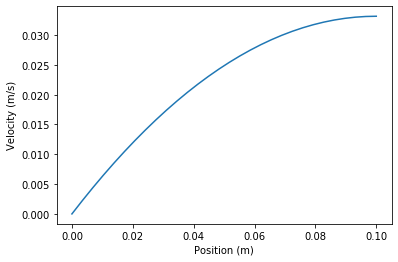

In [5]:
# To visualize the steady-state solution, making sure it looks correct

%matplotlib inline
plt.plot(steady_state_x, steady_state_y)
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.show()

### Conditions and step details

In [6]:
# Time, grid steps and beta factor.

time_size = 0.0001
grid_size = 0.01 # Size 
beta = lava_visc * time_size / (grid_size**2)

In [7]:
# Gravity factor g*sin(alpha)

factor = 9.8 * np.sin(lava_inc)

In [11]:
# Setting up animation grid, final time and initial condition.

x_grid = np.arange(0, 0.11, grid_size)
final_time = 0.06
f_init = np.zeros(len(x_grid))

### Animation

<IPython.core.display.Javascript object>


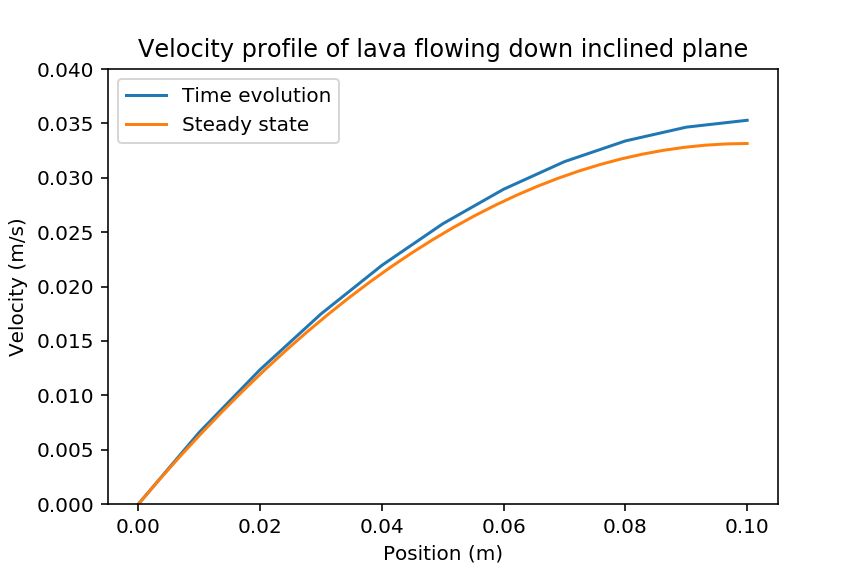

****************************************************************************************************


In [15]:
%matplotlib notebook

# Setting up the tri-diagonal matrix
A = np.eye(len(x_grid)) * (1.0+2.0*beta) + np.eye(len(x_grid), k=1) * \
        -beta + np.eye(len(x_grid), k=-1)*-beta

curr_f = np.copy(f_init)
curr_time = 0 # Initialize time
curr_percent = 0 # Purely decorative, for printing progress bar.

plt.ion()
fig, ax = plt.subplots(1,1)
plot, = ax.plot(x_grid,f_init)

# Imposing no-slip boundary condition:
A[0][0] = 1
A[0][1] = 0

# Imposing no-stress boundary condition:
A[-1][-1] = 1 + beta

fig.canvas.draw()

print('='*100)

# Plot the steady-state solution.
plt.plot(steady_state_x, steady_state_y)

# While loop to plot solution at each time step.
while curr_time <= final_time:
    if curr_time != 0:
        # Solve for velocity field
        curr_f = np.linalg.solve(A, curr_f)
        
        # Adds gravity solution
        curr_f += factor*time_size
        
        # Ensures u(x=0) = 0
        curr_f[0] = 0

    # Purely decorative: printing progress bar to see how long the simulation has left.
    percent_progress = 100*curr_time/final_time
    new_percent = int(percent_progress//1)
    diff_percent = new_percent - curr_percent
    print('*'*diff_percent, end='')
    curr_percent += diff_percent
    
    # Sets the current time.
    curr_time += time_size

    ax.collections = [] # Reset the data
    ax.patches = []
    
    plot.set_ydata(curr_f)
    plt.legend(['Time evolution','Steady state'])
    plt.title('Velocity profile of lava flowing down inclined plane')
    plt.xlabel('Position (m)')
    plt.ylabel('Velocity (m/s)')
    plt.ylim([0, 0.04])
    fig.canvas.draw()
    plt.pause(0.001)
    
# Rounding out the progress bar.
final_perc_diff = 100 - curr_percent
print('*'*final_perc_diff)

Comment: I am unsure whether the ``overshoot" should be part of expectation - however it seems like the simulation does heavily depend on the time and grid resolution chosen.

#### Disclaimer

This code is entirely written by Ruijia Yang myself. It partly uses the code I wrote during the coding lecture, and may be inspired by my classmates and/or advices of prof. Lee.